# Mounting Drive

In [1]:
1 == 1

True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libararies

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Read Dataset

In [5]:
#df = pd.read_csv('Sales Transaction v.4a.csv') #jupyter
df = pd.read_csv('/content/drive/MyDrive/Final Project/M. Alwan Nur Ajie - Progress Script Final Project/Sales Transaction v.4a.csv') #collab

In [6]:
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


# Data Understanding

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


Dataset memiliki 536350 baris dan 8 kolom, dengan deskirpsi kolom:
* TransactionNo (categorical): nomor unik enam digit yang mendefinisikan setiap transaksi. Huruf "C" dalam kode menunjukkan pembatalan transaksi.
* Date (numeric): tanggal saat setiap transaksi dihasilkan.
* ProductNo (categorical): karakter unik lima atau enam digit yang digunakan untuk mengidentifikasi produk tertentu.
* Product (categorical): nama produk/barang.
* Price (numeric): harga setiap produk per unit dalam pound sterling (£).
* Quantity (numeric): jumlah setiap produk per transaksi. Nilai negatif terkait dengan transaksi yang dibatalkan.
* CustomerNo (categorical): nomor unik lima digit yang mendefinisikan setiap pelanggan.
* Country (categorical): nama negara tempat tinggal pelanggan.

## Check Missing Value & Duplicated Value

In [8]:
#Check missing value
df.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [9]:
#percentage missing value in dataset
round(len(df[df.isna().any(axis=1)])/len(df)*100, 2)

0.01

In [10]:
#cleaning data with missing value
df = df.dropna()

In [11]:
#sanity check
df.isnull().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

In [12]:
#check duplicated value
df.duplicated().sum()

5200

In [13]:
#clean duplicated data
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531095 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  531095 non-null  object 
 1   Date           531095 non-null  object 
 2   ProductNo      531095 non-null  object 
 3   ProductName    531095 non-null  object 
 4   Price          531095 non-null  float64
 5   Quantity       531095 non-null  int64  
 6   CustomerNo     531095 non-null  float64
 7   Country        531095 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


In [16]:
df.describe()

,Price,Quantity,CustomerNo
count,531095.000000,531095.000000,531095.000000
mean,12.669635,9.993146,15222.612241
std,8.526181,217.710261,1716.633588
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13798.000000
50%,11.940000,3.000000,15146.000000
75%,14.090000,10.000000,16727.000000
max,660.620000,80995.000000,18287.000000


terdapat negative value di Quantity. Kita harus melakukan cleaning dan di TransactionNo yang mengandung C juga harus dihilangkan

In [17]:
#transaksi dengan indikator C
cancel_trans = df[df['TransactionNo'].str.startswith('C') & (df['Quantity'] < 0)]
cancel_trans

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
1616,C581484,12/9/2019,23843,Paper Craft Little Birdie,6.19,-80995,16446.0,United Kingdom
1617,C581490,12/9/2019,22178,Victorian Glass Hanging T-Light,6.19,-12,14397.0,United Kingdom
1618,C581490,12/9/2019,23144,Zinc T-Light Holder Stars Small,6.04,-11,14397.0,United Kingdom
1619,C581568,12/9/2019,21258,Victorian Sewing Box Large,6.19,-5,15311.0,United Kingdom
1620,C581569,12/9/2019,84978,Hanging Heart Jar T-Light Holder,6.19,-1,17315.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [18]:
cancel_trans.shape

(8494, 8)

karena berisikan invalid values, maka di drop

In [19]:
df = df.drop(df[df['TransactionNo'].str.startswith('C') & (df['Quantity'] < 0)].index)

In [20]:
df.describe()

,Price,Quantity,CustomerNo
count,522601.000000,522601.000000,522601.000000
mean,12.637160,10.667492,15226.311767
std,7.965974,157.542420,1716.555479
min,5.130000,1.000000,12004.000000
25%,10.990000,1.000000,13804.000000
50%,11.940000,4.000000,15152.000000
75%,14.090000,12.000000,16729.000000
max,660.620000,80995.000000,18287.000000


### Mengganti Kolom Date menjadi dtypes,  CustomerNo menjadi object

In [21]:
df['Date'] = pd.to_datetime(df['Date'])
df['CustomerNo'] = df['CustomerNo'].astype('int').astype('object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522601 entries, 0 to 536324
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  522601 non-null  object        
 1   Date           522601 non-null  datetime64[ns]
 2   ProductNo      522601 non-null  object        
 3   ProductName    522601 non-null  object        
 4   Price          522601 non-null  float64       
 5   Quantity       522601 non-null  int64         
 6   CustomerNo     522601 non-null  object        
 7   Country        522601 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 35.9+ MB


### Membuat Fitur Revenue

Terdapat dua kolom yang bisa menghasilkan fitur baru yaitu Price dan Quantity. Jika Price * Quantity = Revenue

In [23]:
df['Revenue'] = df['Price'] * df['Quantity']

## Brief Numerical & Categorical Summary

In [24]:
df.describe()

,Date,Price,Quantity,Revenue
count,522601,522601.000000,522601.000000,5.226010e+05
mean,2019-07-04 03:24:39.489706496,12.637160,10.667492,1.201324e+02
min,2018-12-01 00:00:00,5.130000,1.000000,5.130000e+00
25%,2019-03-28 00:00:00,10.990000,1.000000,1.790000e+01
50%,2019-07-20 00:00:00,11.940000,4.000000,4.448000e+01
75%,2019-10-19 00:00:00,14.090000,12.000000,1.208000e+02
max,2019-12-09 00:00:00,660.620000,80995.000000,1.002718e+06
std,NaN,7.965974,157.542420,1.860159e+03


Observasi:
* Rentang dataset dimulai dari 1 Desember 2018  hingga 9 Desember 2019
* Price, Quantity, dan revenue menunjukan potensial outlier, merujuk beberapa transaksi yang besar.
* Price, Quantity, dan Revenue, distribusi terindikasi right skewed.

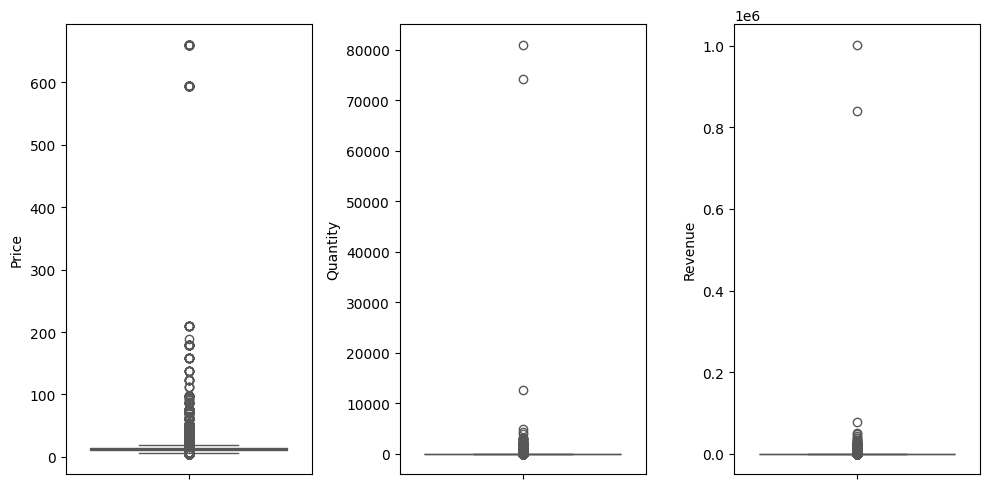

In [25]:
# adjust the figure size for better readability
plt.figure(figsize=(10,5))

# plotting
features = ['Price', 'Quantity', 'Revenue']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='royalblue')
    plt.tight_layout()

In [26]:
# # adjust the figure size for better readability
# plt.figure(figsize=(12,6))

# for i in range(0, len(features)):
#     plt.subplot(1, len(features), i+1)
#     sns.histplot(x=df[features[i]], color='royalblue', kde='true')
#     plt.xlabel(features[i])
#     plt.tight_layout()

In [27]:
df.describe(include = ['object']).T

,count,unique,top,freq
TransactionNo,522601,19789,573585,1110
ProductNo,522601,3753,85123A,2324
ProductName,522601,3753,Cream Hanging Heart T-Light Holder,2324
CustomerNo,522601,4718,17841,7671
Country,522601,38,United Kingdom,472716


# EDA

### How was the sales trend over the months?

In [28]:
# Extract month and year dari kolom  'Date'
df['YearMonth'] = df['Date'].dt.to_period('M')

# Aggregate revenue by month and year
monthly_sales_trend = df.groupby('YearMonth')['Revenue'].sum().reset_index()
monthly_sales_trend.columns = ['YearMonth', 'TotalRevenue']

monthly_sales_trend

,YearMonth,TotalRevenue
0,2018-12,4397648.39
1,2019-01,4548423.47
2,2019-02,3327342.64
3,2019-03,4384669.82
4,2019-04,3579310.06
5,2019-05,4569952.21
6,2019-06,4486050.15
7,2019-07,4571494.88
8,2019-08,4749801.23
9,2019-09,6613772.79


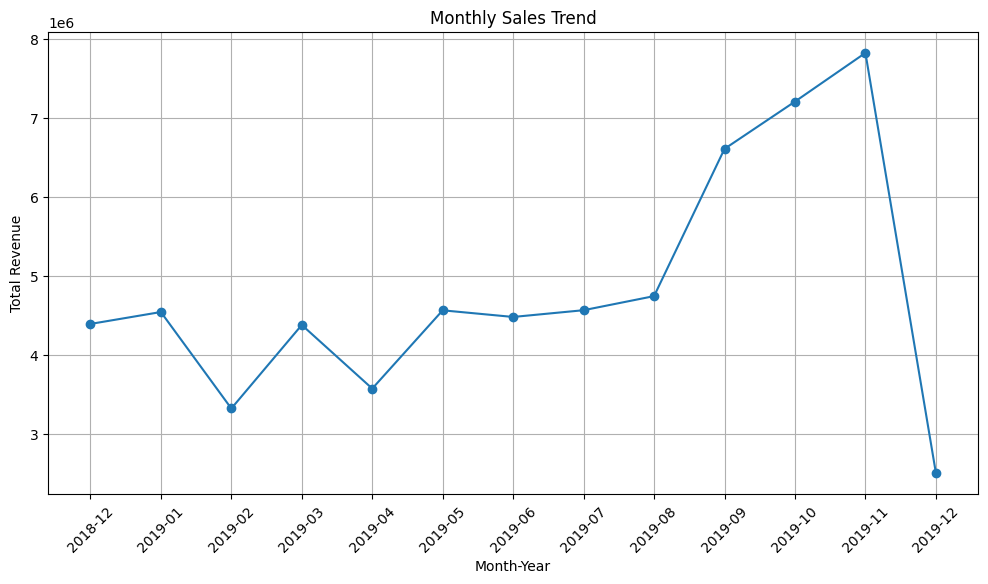

In [29]:
import matplotlib.pyplot as plt

# Plotting the sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_trend['YearMonth'].astype(str), monthly_sales_trend['TotalRevenue'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### How was the sales trend over the day?

In [30]:
df['Day'] = df['Date'].dt.strftime('%w')
df['Day_Name'] = df['Date'].dt.strftime('%A')

In [31]:
Day_Revenue = df.groupby('Day').agg({'Day_Name': 'first', 'Revenue': 'sum', 'TransactionNo': 'count'}).reset_index()
Day_Revenue = Day_Revenue.sort_values('Day', ascending = True)

In [32]:
fig_day_rev = px.line(Day_Revenue, x = "Day_Name", y = "Revenue", title = "Sales Trend Over the Day")
fig_day_rev.update_traces(mode = 'lines+markers')
fig_day_rev.show()

### What the most frequently purchased products?

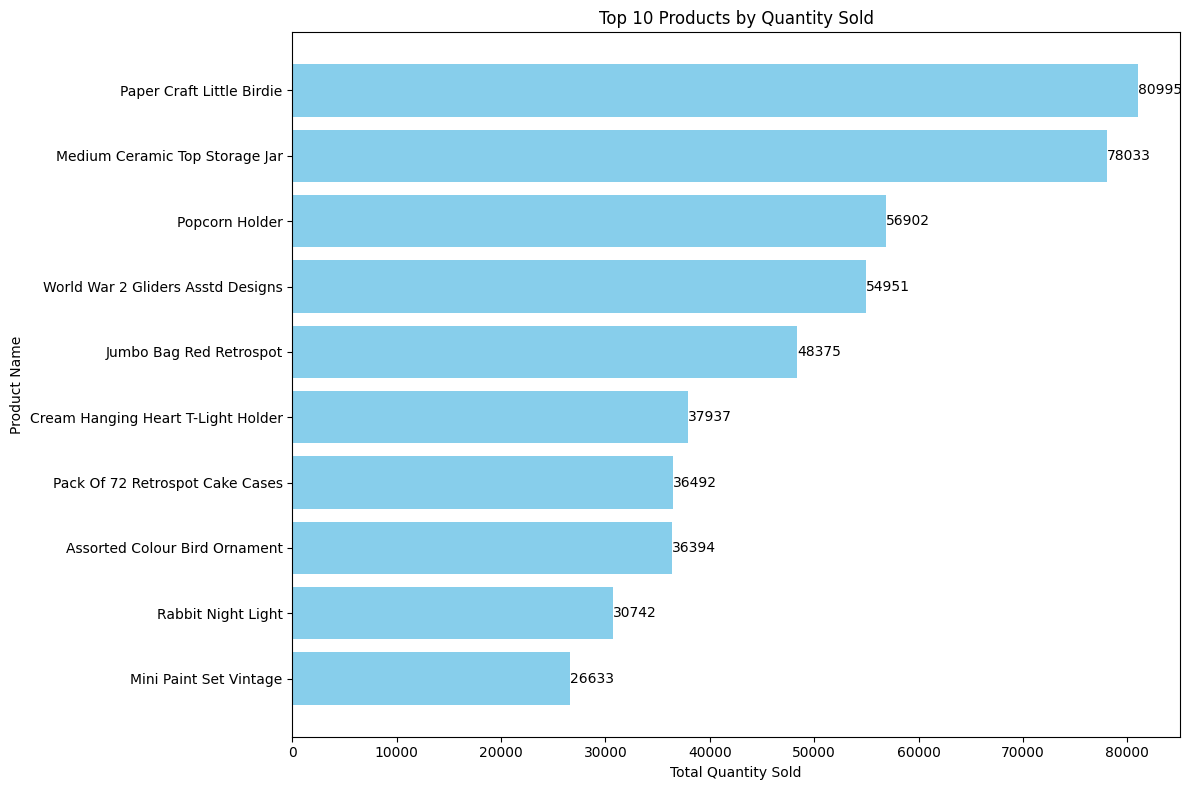

In [33]:
# Aggregate the quantity of each product sold
top_products = df.groupby('ProductName')['Quantity'].sum().reset_index()

# Sort the products by quantity sold in descending order
top_products = top_products.sort_values(by='Quantity', ascending=False).head(10)

# Plot the top 10 products by quantity sold with quantity labels on the bars
plt.figure(figsize=(12, 8))
bars = plt.barh(top_products['ProductName'], top_products['Quantity'], color='skyblue')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Quantity Sold')
plt.gca().invert_yaxis()


for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}',
             va='center', ha='left', color='black', fontsize=10)

plt.tight_layout()
plt.show()

### What is the most Revenue by Products Name?

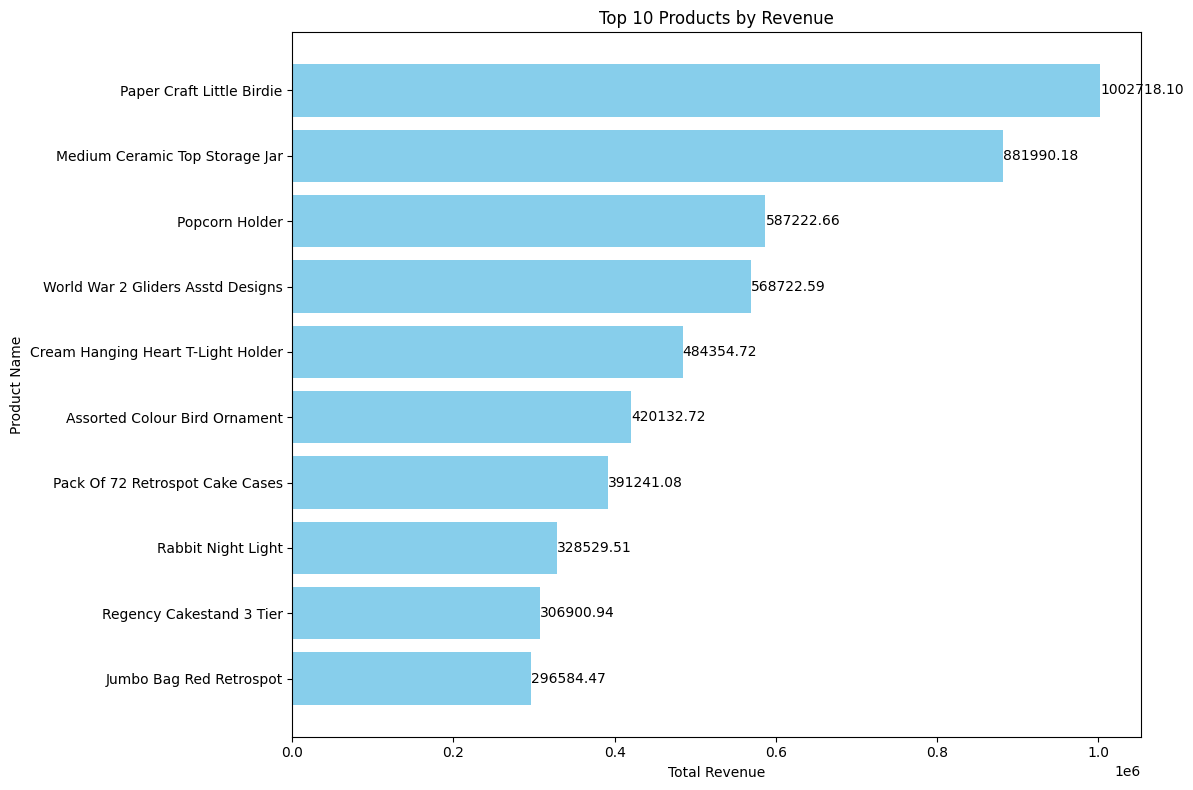

,ProductName,Revenue
2203,Paper Craft Little Birdie,1002718.10
1887,Medium Ceramic Top Storage Jar,881990.18
2481,Popcorn Holder,587222.66
3670,World War 2 Gliders Asstd Designs,568722.59
825,Cream Hanging Heart T-Light Holder,484354.72
203,Assorted Colour Bird Ornament,420132.72
2157,Pack Of 72 Retrospot Cake Cases,391241.08
2540,Rabbit Night Light,328529.51
2652,Regency Cakestand 3 Tier,306900.94
1672,Jumbo Bag Red Retrospot,296584.47


In [34]:
# Aggregate the revenue of each product
top_revenue_products = df.groupby('ProductName')['Revenue'].sum().reset_index()
top_revenue_products = top_revenue_products.sort_values(by='Revenue', ascending=False).head(10)

# Plot the top 10 products by revenue
plt.figure(figsize=(12, 8))
bars = plt.barh(top_revenue_products['ProductName'], top_revenue_products['Revenue'], color='skyblue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Revenue')
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left', color='black', fontsize=10)

plt.tight_layout()
plt.show()
top_revenue_products

### What countries that generated highest revenue?

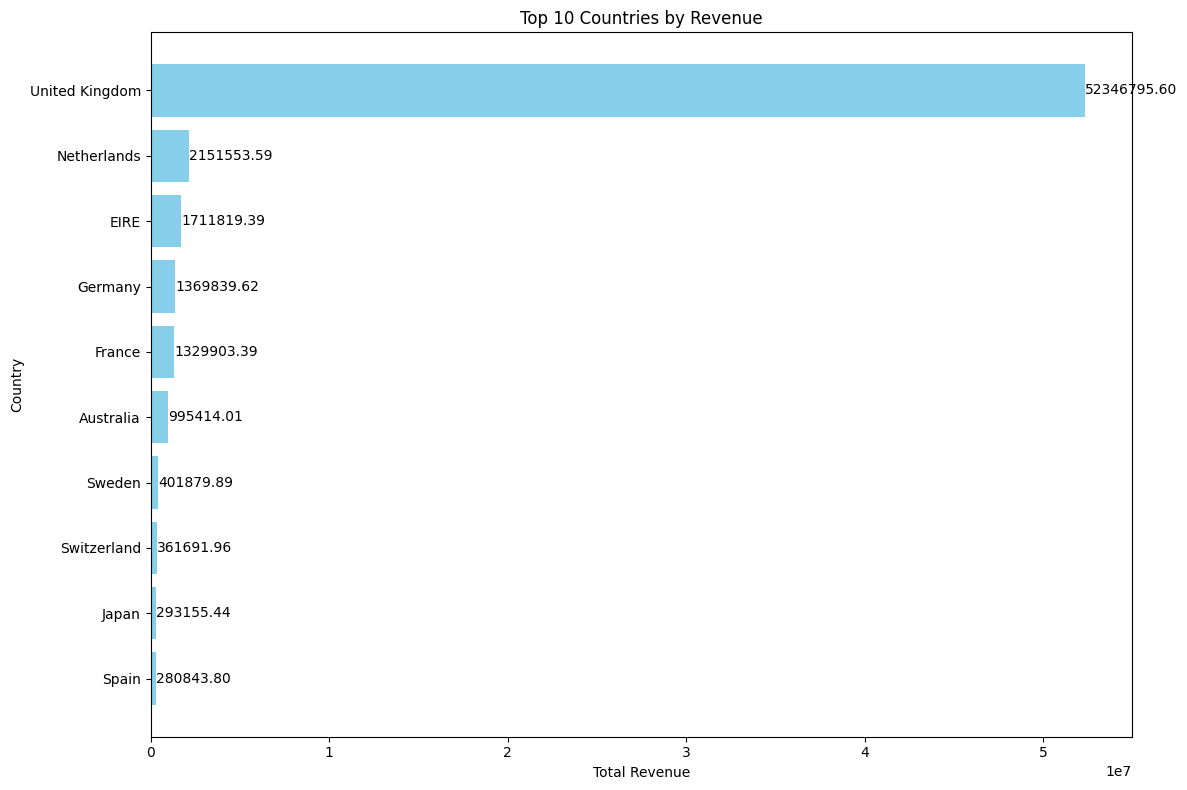

,Country,Revenue
36,United Kingdom,52346795.60
24,Netherlands,2151553.59
10,EIRE,1711819.39
14,Germany,1369839.62
13,France,1329903.39
0,Australia,995414.01
32,Sweden,401879.89
33,Switzerland,361691.96
20,Japan,293155.44
31,Spain,280843.80


In [35]:
# Aggregate the revenue of each country
top_revenue_countries = df.groupby('Country')['Revenue'].sum().reset_index()
top_revenue_countries = top_revenue_countries.sort_values(by='Revenue', ascending=False).head(10)

# Plot the top 10 countries by revenue
plt.figure(figsize=(12, 8))
bars = plt.barh(top_revenue_countries['Country'], top_revenue_countries['Revenue'], color='skyblue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.title('Top 10 Countries by Revenue')
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left', color='black', fontsize=10)

plt.tight_layout()
plt.show()
top_revenue_countries


# Preprocessing

## RFM

In [36]:
# Menghitung Recency
recency = df.groupby('CustomerNo',as_index=False)['Date'].max()
recency.columns = ['CustomerNo', 'LastPurchaseDate']
recent_date = pd.to_datetime('2019-12-10') #anggap analisa dilakukan 1 hari dari hari terakhir transaksi
recency['Recency'] = recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
print(f'recent_date: {recent_date}')
recency

recent_date: 2019-12-10 00:00:00


,CustomerNo,LastPurchaseDate,Recency
0,12004,2019-04-26,228
1,12006,2019-05-05,219
2,12008,2019-03-08,277
3,12013,2018-12-15,360
4,12024,2019-06-16,177
...,...,...,...
4713,18280,2019-03-07,278
4714,18281,2019-06-12,181
4715,18282,2019-12-02,8
4716,18283,2019-12-06,4


In [37]:
# Menghitung Frequency
freq = df.groupby(['CustomerNo'], as_index=False)['TransactionNo'].nunique()
freq.columns = ['CustomerNo', 'Frequency']
freq.sort_values('Frequency',ascending=False)

,CustomerNo,Frequency
408,12748,207
2085,14911,198
4384,17841,125
667,13089,98
2406,15311,91
...,...,...
2339,15226,1
2345,15234,1
2347,15236,1
2357,15247,1


In [38]:
# Calculate Monetary
monetary = df.groupby('CustomerNo',as_index=False)['Revenue'].sum()
monetary.columns = ['CustomerNo','Monetary']
monetary.sort_values('Monetary',ascending=False)

,CustomerNo,Monetary
1880,14646,2112282.03
3302,16446,1002741.57
2085,14911,914204.19
126,12415,900545.54
4581,18102,897137.36
...,...,...
61,12309,12.86
1716,14435,12.38
453,12810,11.98
1208,13775,11.53


In [39]:
# Merge data
rf = recency.merge(freq, on='CustomerNo')
rfm = rf.merge(monetary, on='CustomerNo').drop('LastPurchaseDate',axis=1)
rfm

,CustomerNo,Recency,Frequency,Monetary
0,12004,228,1,1509.60
1,12006,219,1,24.76
2,12008,277,1,5689.57
3,12013,360,1,69.96
4,12024,177,1,149.52
...,...,...,...,...
4713,18280,278,1,623.26
4714,18281,181,1,576.58
4715,18282,8,2,1044.86
4716,18283,4,16,11773.90


In [40]:
rfm.describe(exclude = 'object').round(1).T

,count,mean,std,min,25%,50%,75%,max
Recency,4718.0,97.0,101.8,1.0,19.0,54.0,156.8,374.0
Frequency,4718.0,4.2,7.4,1.0,1.0,2.0,5.0,207.0
Monetary,4718.0,13306.8,54370.4,6.0,1829.8,4804.4,11830.3,2112282.0


### RFM Distribution

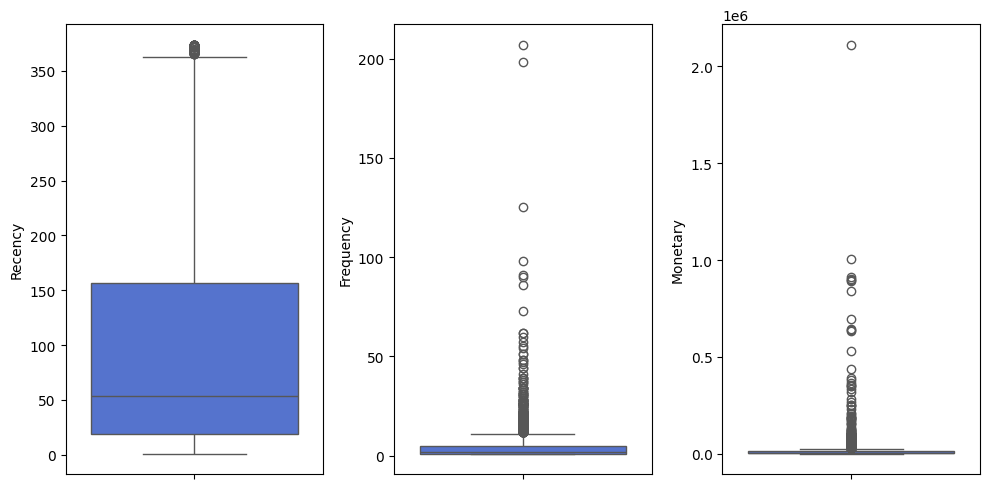

In [41]:
# adjust the figure size for better readability
plt.figure(figsize=(10,5))

# plotting
features = ['Recency', 'Frequency', 'Monetary']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=rfm[features[i]], color='royalblue')
    plt.tight_layout()

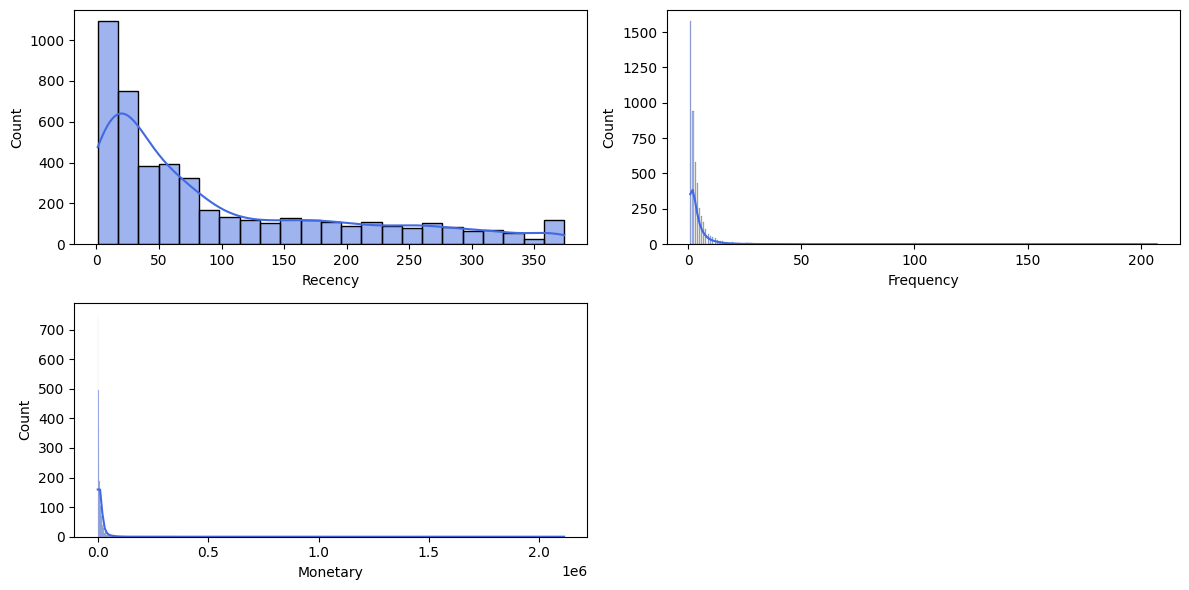

In [42]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.histplot(x=rfm[features[i]], color='royalblue', kde='true')
    plt.xlabel(features[i])
    plt.tight_layout()

In [43]:
# Skewness measure
print(f'Skewness measurements: \n{rfm.skew(numeric_only = True)}')

Skewness measurements: 
Recency       1.161480
Frequency    12.232359
Monetary     20.257710
dtype: float64


* mayoritas pelanggan melakukan pembelian terakhir mereka dalam 100 hari terakhir, sementara beberapa pelanggan sudah lama tidak melakukan pembelian.
* beberapa pelanggan melakukan pembelian dalam jumlah besar
* Sebagian besar pendapatan berasal dari sejumlah kecil pelanggan dengan nilai pembelian yang tinggi.

### Outlier Handling

In [44]:
# #total row sebelum handling
# before = len(rfm)
# print(f'Rows before outlier handling: {before}')

# # Creating the filter mask
# filtered_entries = np.array([True] * len(rfm))

# cols = rfm.columns[1:]

# # IQR filtering
# for i in cols:
#     q1 = rfm[i].quantile(0.25)
#     q3 = rfm[i].quantile(0.75)
#     iqr = q3 - q1
#     low_limit = q1 - (1.5 * iqr)
#     high_limit = q3 + (1.5 * iqr)
#     filtered_entries = ((rfm[i] >= low_limit) & (rfm[i] <= high_limit)) & filtered_entries

# # Filtering original data dari outlier
# rfm = rfm[filtered_entries]

# # Total row setelah handling
# after = len(rfm)
# print(f'Rows after outlier handling: {len(rfm)}')
# print(f'Data loss: {round((before - after) / after * 100, 2)}%')

In [45]:
# # adjust the figure size for better readability
# plt.figure(figsize=(10,5))

# # plotting
# features = ['Recency', 'Frequency', 'Monetary']
# for i in range(0, len(features)):
#     plt.subplot(1, len(features), i+1)
#     sns.boxplot(y=rfm[features[i]], color='royalblue')
#     plt.tight_layout()

### Scaling

In [46]:
rfm_copy = rfm.copy()

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
rfm_copy = rfm_copy.iloc[:, 1:]

# scaling dengan standardscaler
rfm_features_std = StandardScaler().fit_transform(rfm_copy)
rfm_features_std = pd.DataFrame(rfm_features_std, columns=rfm_copy.columns)

rfm_features_std.head(5)

,Recency,Frequency,Monetary
0,1.287572,-0.431944,-0.217001
1,1.199118,-0.431944,-0.244313
2,1.769156,-0.431944,-0.140113
3,2.584901,-0.431944,-0.243482
4,0.786331,-0.431944,-0.242018


# Mencari Nilai K Optimal untuk Clustering


## Elbow Method

In [ ]:
# mencari nilai k optimal dengan parameter inertia
from sklearn.cluster import KMeans

inertia = []
k_values = range(2,11)

# fit model
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(rfm_features_std)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

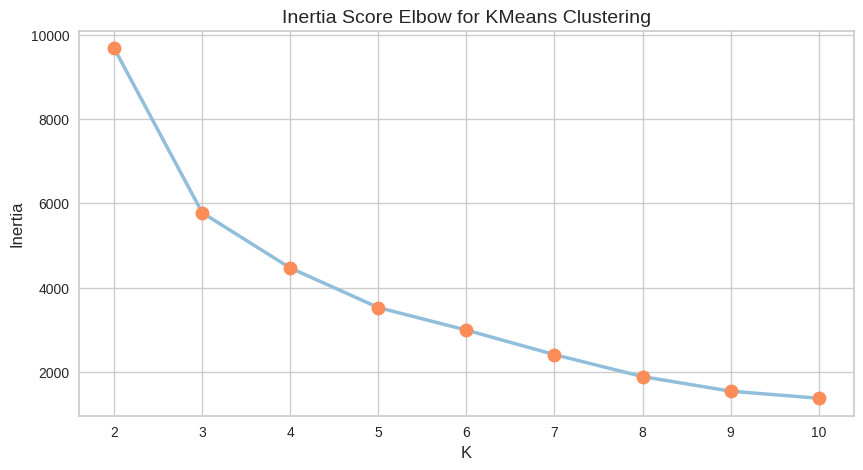

In [ ]:
# Visualisasi grafik elbow method
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(10, 5))

# plot grafik
plt.plot(k_values, inertia ,color='#91bfdb', linewidth= 2.5, marker='o', markerfacecolor='#fc8d59', markersize=10)
plt.title('Inertia Score Elbow for KMeans Clustering', fontsize=14)
plt.xlabel('K',fontsize=12)
plt.ylabel('Inertia',fontsize=12)

Berdasarkan grafik yang dihasilkan tidak terlalu terlihat penurunaan nilai dan patahan yang tajam, sehingga nilai k yang optimal tidak terlalu diketahui dengan pasti.

In [ ]:
from sklearn.cluster import KMeans

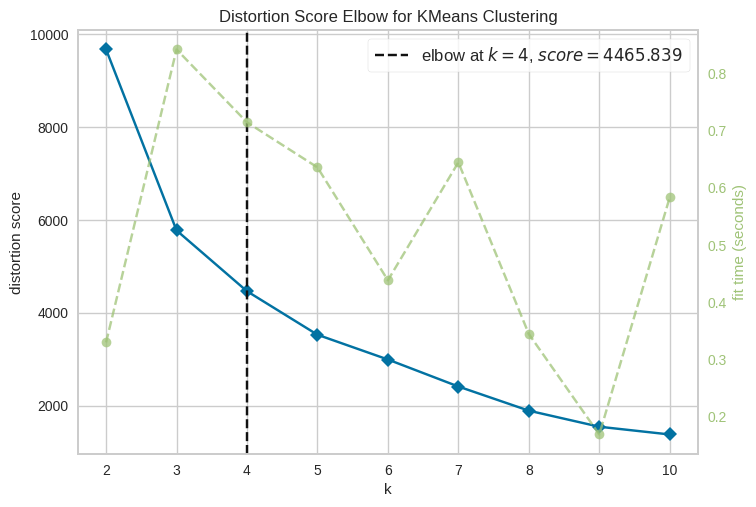

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# visualisasi innertia vs k dengan parameter distortion
from yellowbrick.cluster import KElbowVisualizer

# fit model
model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, k=(2,11), metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(rfm_features_std)
visualizer.show()

Berdasarkan grafik diatas, dengan parameter distortion nilai optimal k = 4

## Silhouette Score

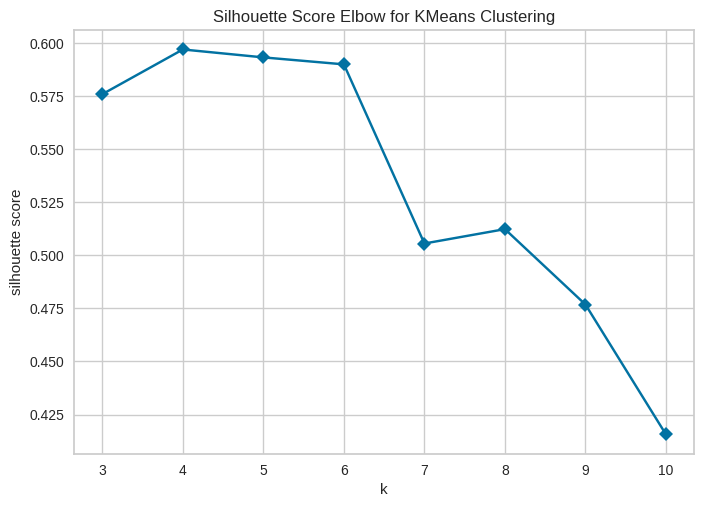

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,11), metric='silhouette', timings=False, locate_elbow=False)
visualizer.fit(rfm_features_std)
visualizer.show()

Berdasarkan hasil diatas dipeoleh banyak cluster optimal yang terbentuk pada k = 4

In [ ]:
# # silhouette plot
# from yellowbrick.cluster import SilhouetteVisualizer

# for i in [3,4,8]:
#     model = KMeans(i, random_state=42)
#     visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
#     visualizer.fit(rfm_features_std)
#     visualizer.show()

# K- Means Clustering

In [49]:
from sklearn.cluster import KMeans

# fit model
kmeans = KMeans(n_clusters=4, random_state = 123)
kmeans.fit(rfm_features_std.values)
rfm_features_std['Cluster'] = kmeans.labels_

In [50]:
rfm_features_std.head()

,Recency,Frequency,Monetary,Cluster
0,1.287572,-0.431944,-0.217001,3
1,1.199118,-0.431944,-0.244313,3
2,1.769156,-0.431944,-0.140113,3
3,2.584901,-0.431944,-0.243482,3
4,0.786331,-0.431944,-0.242018,3


## Evaluasi dengan PCA dan Visualisasi

In [51]:
## melakukan PCA untuk melihat visualisasi
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(rfm_features_std)
pcs = pca.transform(rfm_features_std)


df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['Cluster'] = rfm_features_std['Cluster']
df_pca

,PC 1,PC 2,Cluster
0,-1.871467,0.796937,3
1,-1.829462,0.741871,3
2,-2.126017,1.049990,3
3,-2.641302,1.326570,3
4,-1.586721,0.569361,3
...,...,...,...
4713,-2.165330,0.993472,3
4714,-1.606933,0.591046,3
4715,0.555063,-0.853046,1
4716,2.097015,-0.215271,0


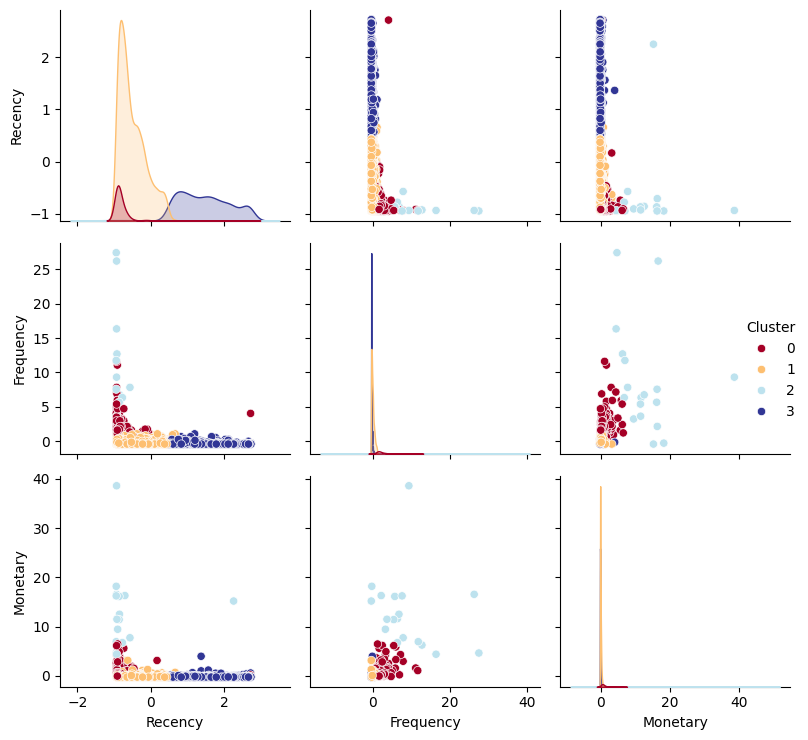

In [52]:
# visualisasi dengan pairplot
sns.pairplot(data=rfm_features_std, hue='Cluster', diag_kind='kde', palette='RdYlBu')
plt.tight_layout()

Text(0.5, 1.0, 'Customer Segmentation Based on RFM Model')

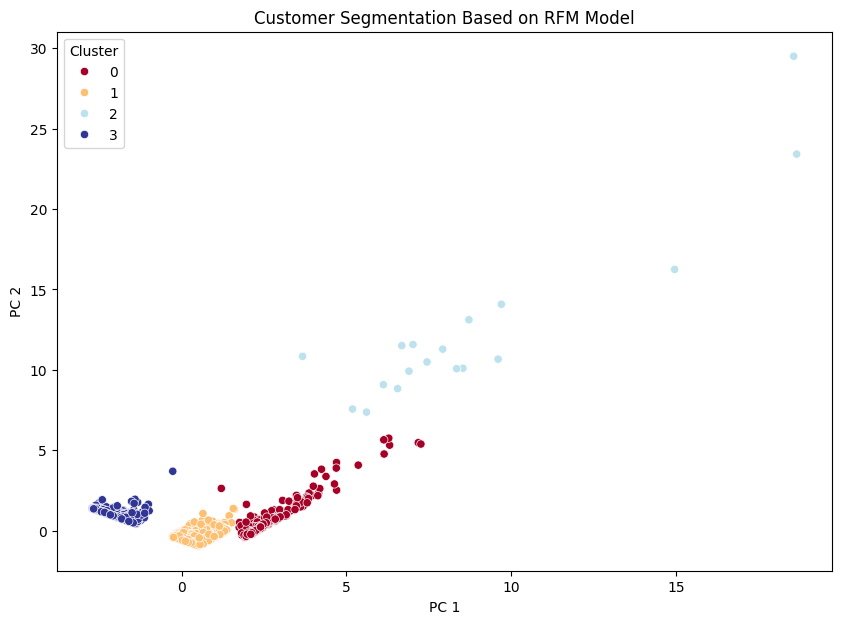

In [53]:
# visualisasi hasi segmentasi
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data=df_pca, x="PC 1", y="PC 2", hue="Cluster", palette='RdYlBu')
plt.title('Customer Segmentation Based on RFM Model')

Interpretasi Model dan Rekomendasi

## Menambah Cluster ke Dataframe

In [54]:
# menambahkan cluster ke dataframe
rfm_copy['Cluster'] = kmeans.labels_

In [67]:
# menambahkan cluster ke dataframe
rfm['Cluster'] = kmeans.labels_

In [68]:
# For Streamlit
rfm.to_csv('rfm_segment.csv', index = False)

## Visualisasi RFM

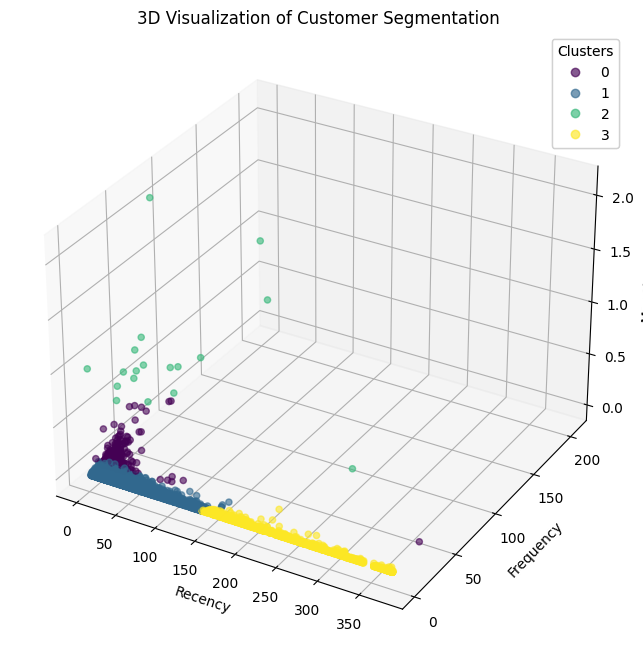

In [66]:
from mpl_toolkits.mplot3d import Axes3D
# Plotting 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(rfm_copy['Recency'], rfm_copy['Frequency'], rfm_copy['Monetary'],
                c=rfm_copy['Cluster'], cmap='viridis', alpha=0.6)

# Labels and Title
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Visualization of Customer Segmentation')

# Legend
legend = ax.legend(*sc.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

## Persentase Customer

In [57]:
# persentase customer setiap cluster
cluster_count = rfm_copy['Cluster'].value_counts().reset_index()
cluster_count.columns = ['Cluster', 'count']
cluster_count['percentage (%)'] = round((cluster_count['count']/len(rfm_features_std))*100,2)
cluster_count = cluster_count.sort_values(by=['Cluster']).reset_index(drop=True)
cluster_count

,Cluster,count,percentage (%)
0,0,257,5.45
1,1,3187,67.55
2,2,18,0.38
3,3,1256,26.62


Text(0, 0.5, 'Percentage')

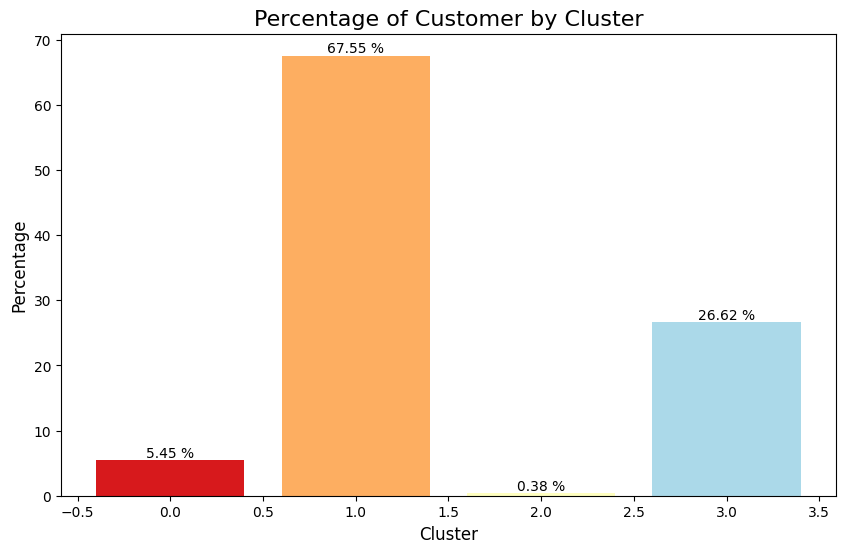

In [58]:
#visualisasi persentase customer pada setiap cluster
fig, ax = plt.subplots(figsize=(10,6))

c = ["#d7191c","#fdae61","#ffffbf","#abd9e9","#2c7bb6"]
bars = plt.bar(x=cluster_count['Cluster'], height= cluster_count['percentage (%)'],color=c)

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height} %', ha='center',
  va='bottom')
plt.title('Percentage of Customer by Cluster', fontsize=16)
plt.xlabel('Cluster',fontsize=12)
plt.ylabel('Percentage',fontsize=12)

## Segmentation Analysis

Text(0, 0.5, 'Value')

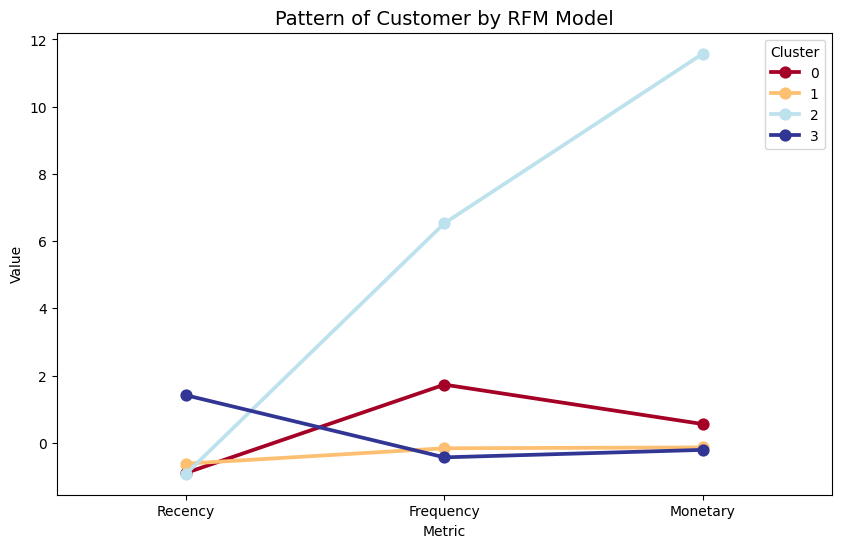

In [59]:
# melihat pola RFM pada setiap cluster
cluster_med=rfm_features_std.groupby('Cluster').median().reset_index()

df_melt = pd.melt(cluster_med.reset_index(), id_vars='Cluster', value_vars=['Recency', 'Frequency','Monetary'], var_name='Metric', value_name='Value')
plt.figure(figsize=(10,6))
sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster', palette='RdYlBu')
plt.title('Pattern of Customer by RFM Model', fontsize=14)
plt.xlabel('Metric')
plt.ylabel('Value')

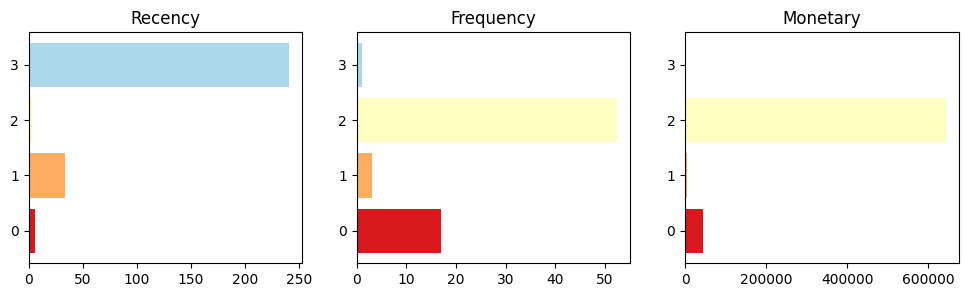

In [60]:
# melihat rata-rata variabel RFM antar cluster
RFM = ['Recency','Frequency','Monetary']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*4,3])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        # ax.vlines(rfm_copy[col].median(), ymin=0, ymax=3, color='grey', linestyle='--')
        g = rfm_copy  .groupby('Cluster')
        x = g[col].median().index
        y = g[col].median().values
        ax.barh(x,y, color=c)
        plt.title(col)
        i = i+1

dist_list(RFM)

In [61]:
# display(rfm_copy.groupby('Cluster').agg(['mean','median','min','max']))
display(rfm_copy.groupby('Cluster').agg(['median']))

,Recency,Frequency,Monetary
,median,median,median
Cluster,,,
0,6.0,17.0,43680.460
1,34.0,3.0,5922.960
2,3.5,52.5,642561.485
3,241.0,1.0,1904.250


### Interpretasi

Cluster 0 -> Frequent High Spender

Karakteristik:
* Pelanggan dalam cluster ini lumayan sering melakukan pembelian dan melakuakn pembelian dalam jumlah relatif besar

* Mereka baru saja melakukan pembelian (nilai Recency rendah), yang menunjukkan bahwa mereka sangat aktif.

Cluster 1 -> Regular Shopper

Karakteristik:
* Pelanggan dalam cluster ini memiliki nilai transaksi yang moderat dan melakukan pembelian dengan frekuensi yang juga moderat.

* Mereka memiliki recency yang lebih tinggi dibandingkan beberapa cluster lain, menunjukkan bahwa mereka mungkin belum melakukan pembelian baru-baru ini, tetapi masih cukup aktif.



Cluster 2 -> Loyal High Spender

Karakteristik:
* Pelanggan dalam cluster ini adalah yang paling berharga dengan nilai transaksi yang sangat tinggi dan frekuensi pembelian yang sangat sering..

* Mereka baru saja melakukan pembelian, menunjukkan tingkat aktivitas yang sangat tinggi.

Cluster 3 -> Inactive Low Spender

Karakteristik:
* Pelanggan dalam cluster ini memiliki nilai transaksi yang rendah dan frekuensi pembelian yang sangat rendah.
* Mereka tidak melakukan pembelian baru-baru ini, menunjukkan bahwa mereka mungkin sudah tidak aktif.

# Rekomendasi

Cluster 0:
* memberikan program loyalitas seperti poin reward tambahan atau gratis ongkos kirim
* Promosikan produk terkait atau produk lebih premium yang mungkin menarik bagi mereka dengan rekomendasi khusus di halaman produk
* Kirimkan penawaran yang dipersonalisasi berdasarkan riwayat pembelian mereka melalui email atau notifikasi aplikasi.

Cluster 1:
* Mengirimkan penawaran khusus atau diskon pada momen spesial atau hari libur untuk mendorong mereka berbelanja lebih sering.
* Berikan diskon khusus untuk pembelian berikutnya yang berlaku untuk jangka waktu terbatas.
* Menawarkan insentif bagi pelanggan untuk merujuk teman atau keluarga, seperti diskon untuk setiap referral yang berhasil.

Cluster 2:
* Membuat program VIP yang memberikan manfaat eksklusif seperti hadiah khusus, prioritas layanan pelanggan yang ekslusif.
* Berikan penghargaan tambahan atas kesetiaan mereka, seperti poin reward ekstra atau voucher belanja..
*  Kirimkan ucapan terima kasih pribadi atau hadiah kecil untuk memperkuat hubungan dan meningkatkan loyalitas.

Cluster 3:
* Luncurkan kampanye reaktivasi dengan penawaran yang menarik, seperti diskon besar atau gratis ongkos kirim, untuk mendorong mereka kembali berbelanja.
* Minta umpan balik untuk memahami mengapa mereka tidak aktif dan apa yang bisa diperbaiki untuk menarik minat mereka kembali.
*  Mengirimkan pesan yang dipersonalisasi untuk mengingatkan mereka tentang produk yang pernah mereka beli atau yang mungkin mereka minati